# **2. Gerekli Kütüphaneleri Import Etme**

In [1]:
# Pandas, NumPy, Seaborn, Matplotlib ve Sklearn kütüphanelerini içe aktarma
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, metrics, model_selection, preprocessing

# **3. Exploratory Data Analysis (EDA) Yapma**

In [2]:
# Veriyi okuma
data = pd.read_csv('insurance.csv')

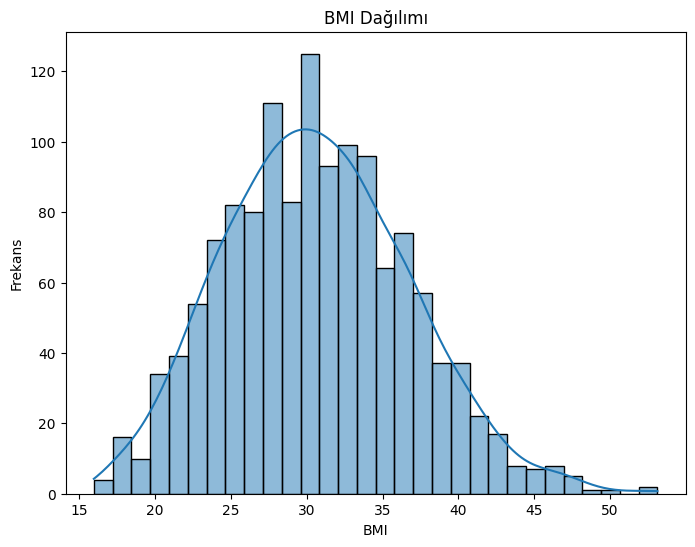

In [3]:
# Vücut Kitle İndeksi (BMI) Dağılımı
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=30, kde=True)
plt.title('BMI Dağılımı')
plt.xlabel('BMI')
plt.ylabel('Frekans')
plt.show()

# Bmi dağılımı normal dağılıma yakın görünüyor. Ortalama bmi değeri yaklaşık 30.

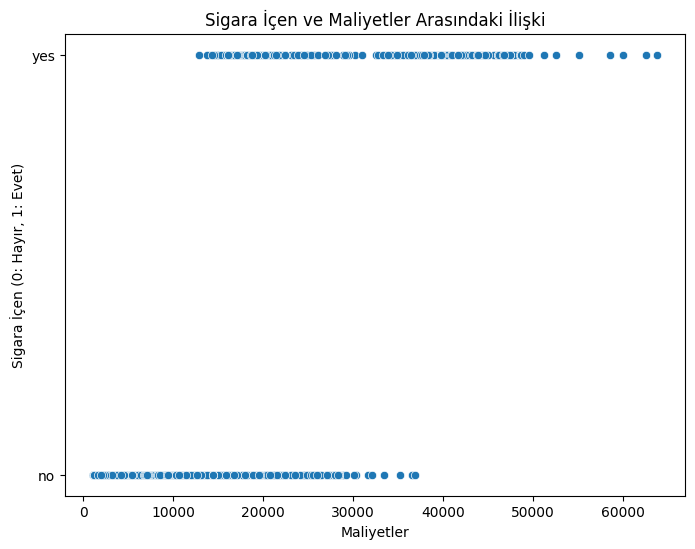

In [4]:
# "Sigara İçen" ile "Maliyetler" Arasındaki İlişki
plt.figure(figsize=(8, 6))
sns.scatterplot(x='charges', y='smoker', data=data)
plt.title('Sigara İçen ve Maliyetler Arasındaki İlişki')
plt.xlabel('Maliyetler')
plt.ylabel('Sigara İçen (0: Hayır, 1: Evet)')
plt.show()

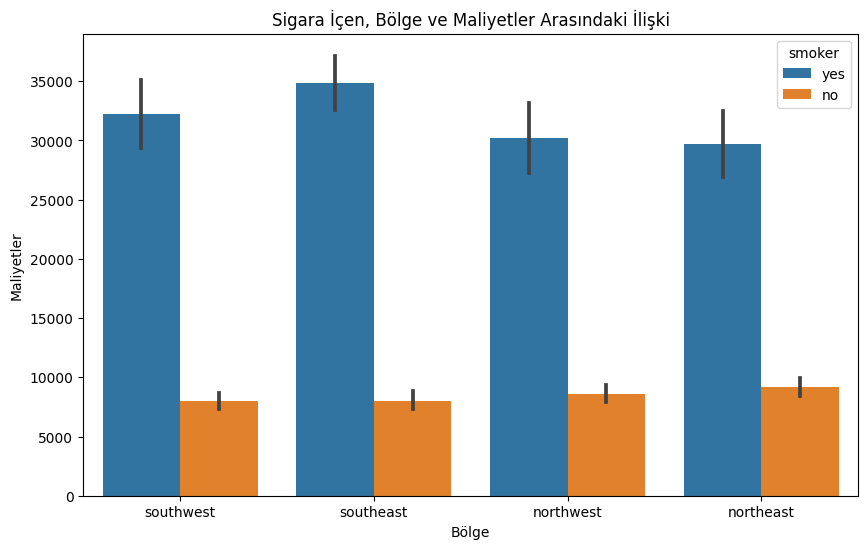

'\nSigara içenlerin sayısı bölgeye göre değişiyor.\nGüneydoğu bölgesinde en fazla sigara içen var. Kuzeybatı bölgesinde en az sigara içen var.\n'

In [5]:
# "Sigara İçen" ile "Bölge" Arasındaki İlişki
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', hue='smoker', data=data)
plt.title('Sigara İçen, Bölge ve Maliyetler Arasındaki İlişki')
plt.xlabel('Bölge')
plt.ylabel('Maliyetler')
plt.show()

'''
Sigara içenlerin sayısı bölgeye göre değişiyor.
Güneydoğu bölgesinde en fazla sigara içen var. Kuzeybatı bölgesinde en az sigara içen var.
'''

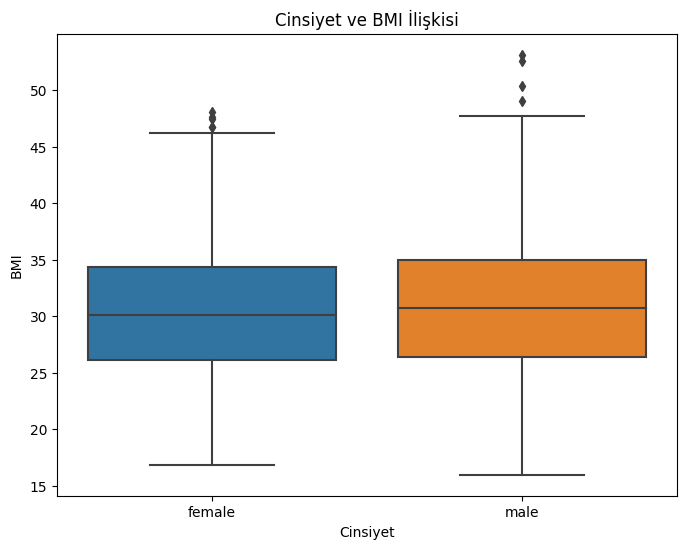

'\nErkeklerin ve kadınların bmi değerleri arasında\nçok büyük bir fark yok. Erkeklerin bmi değerleri biraz daha yüksek.\n'

In [6]:
# "Bmi" ile "Cinsiyet" Arasındaki İlişki
plt.figure(figsize=(8, 6))
sns.boxplot(x='sex', y='bmi', data=data)
plt.title('Cinsiyet ve BMI İlişkisi')
plt.xlabel('Cinsiyet')
plt.ylabel('BMI')
plt.show()

'''
Erkeklerin ve kadınların bmi değerleri arasında
çok büyük bir fark yok. Erkeklerin bmi değerleri biraz daha yüksek.
'''

In [7]:
# En Fazla Çocuğa Sahip Bölge
max_children_region = data.groupby('region')['children'].sum().idxmax()
print(f"En fazla çocuğa sahip bölge: {max_children_region}")

'''
Güneydoğu bölgesi ortalama olarak en çok çocuğa sahip bölge.
Kuzeydoğu bölgesi ise en az çocuğa sahip bölge.
'''

En fazla çocuğa sahip bölge: southeast


'\nGüneydoğu bölgesi ortalama olarak en çok çocuğa sahip bölge.\nKuzeydoğu bölgesi ise en az çocuğa sahip bölge.\n'

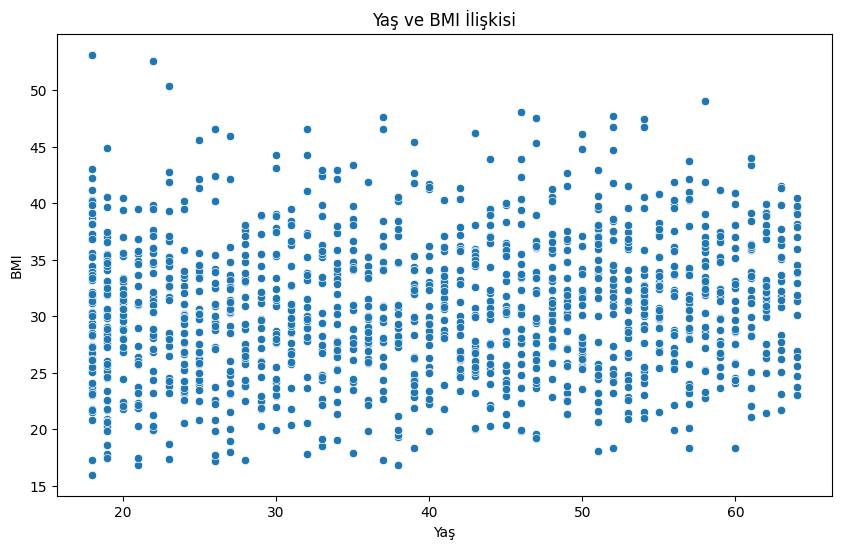

'\nYaş ve bmi arasında güçlü bir ilişki görünmüyor. Yaş ilerledikçe bmi değişkenliği artıyor.\n'

In [8]:
# "Yaş" ile "BMI" Arasındaki İlişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=data)
plt.title('Yaş ve BMI İlişkisi')
plt.xlabel('Yaş')
plt.ylabel('BMI')
plt.show()

'''
Yaş ve bmi arasında güçlü bir ilişki görünmüyor. Yaş ilerledikçe bmi değişkenliği artıyor.
'''

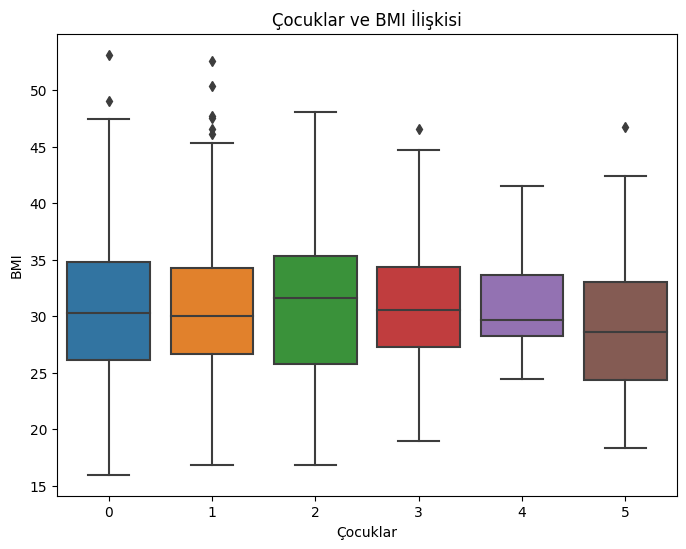

'\nÇocuk sayısı ve bmi arasında belirgin bir ilişki görünmüyor.\nÇocuk sayısı arttıkça bmi değişkenliği azalıyor.\n'

In [9]:
# "BMI" ile "Çocuklar" Arasındaki İlişki
plt.figure(figsize=(8, 6))
sns.boxplot(x='children', y='bmi', data=data)
plt.title('Çocuklar ve BMI İlişkisi')
plt.xlabel('Çocuklar')
plt.ylabel('BMI')
plt.show()

'''
Çocuk sayısı ve bmi arasında belirgin bir ilişki görünmüyor.
Çocuk sayısı arttıkça bmi değişkenliği azalıyor.
'''

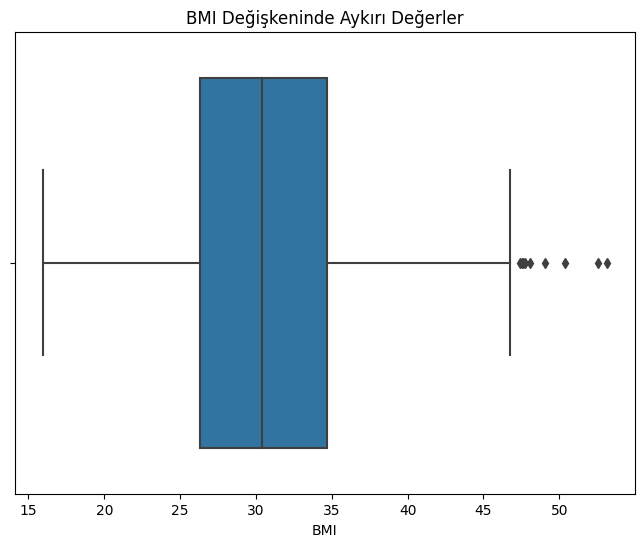

"\nBmi değişkeninde 47'den büyük olan değerler aykırı değer olarak görülebilir.\nBu değerler veri kümesinden çıkarılabilir veya başka bir yöntemle düzeltilmeye çalışılabilir.\n"

In [10]:
# "BMI" Değişkeninde Aykırı Değerler
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['bmi'])
plt.title('BMI Değişkeninde Aykırı Değerler')
plt.xlabel('BMI')
plt.show()

'''
Bmi değişkeninde 47'den büyük olan değerler aykırı değer olarak görülebilir.
Bu değerler veri kümesinden çıkarılabilir veya başka bir yöntemle düzeltilmeye çalışılabilir.
'''

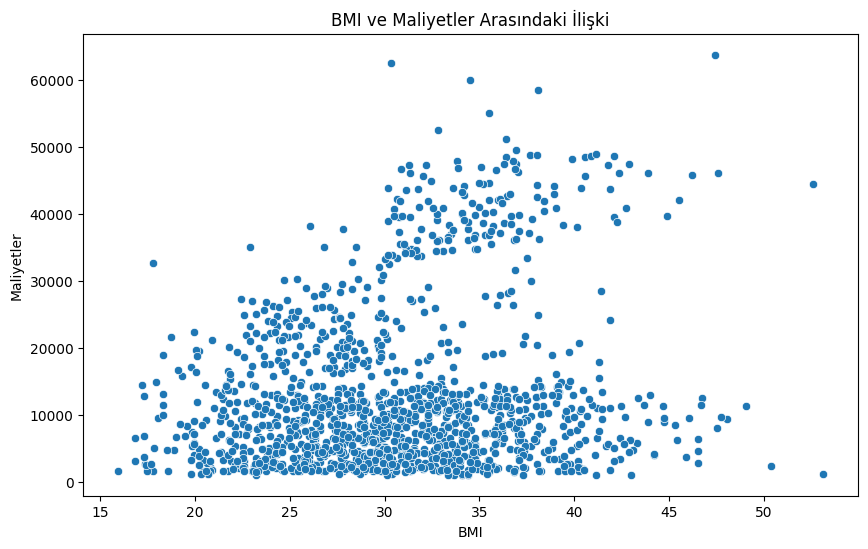

'\nBmi ve charges arasında zayıf bir pozitif ilişki var.\nBmi arttıkça charges da artıyor, ancak çok belirgin değil.\n'

In [11]:
# "BMI" ile "Maliyetler" Arasındaki İlişki
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('BMI ve Maliyetler Arasındaki İlişki')
plt.xlabel('BMI')
plt.ylabel('Maliyetler')
plt.show()

'''
Bmi ve charges arasında zayıf bir pozitif ilişki var.
Bmi arttıkça charges da artıyor, ancak çok belirgin değil.
'''

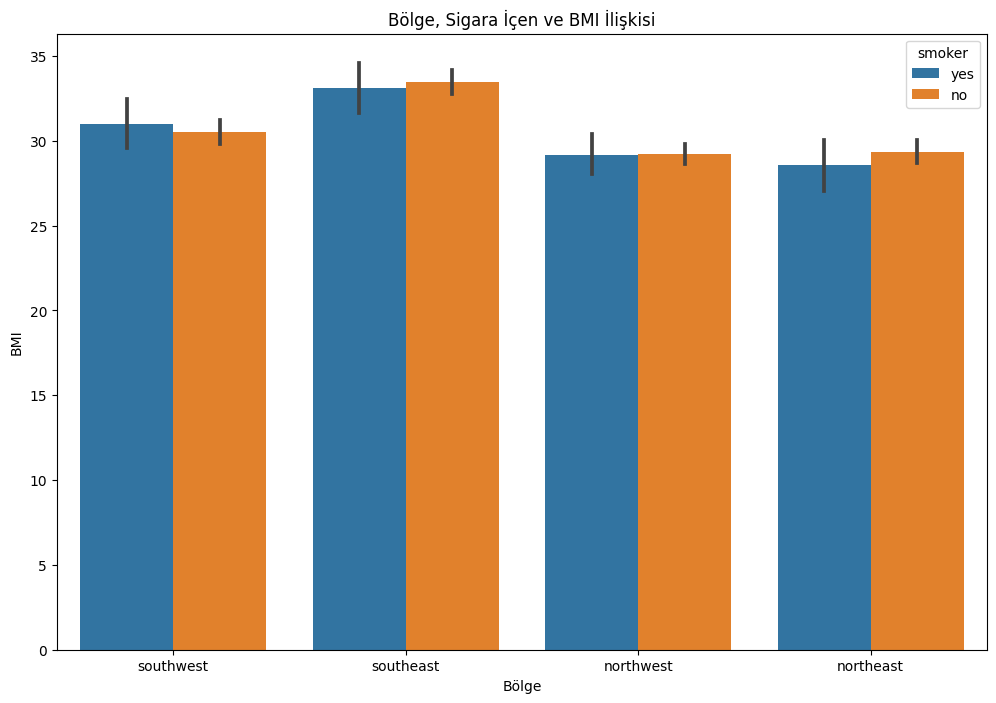

'\nSigara içenlerin bmi değerleri sigara içmeyenlere göre daha yüksek.\nGüneydoğu bölgesinde hem sigara içenlerin hem de sigara içmeyenlerin bmi değerleri en yüksek.\nKuzeybatı bölgesinde ise en düşük.\n'

In [12]:
# "Bölge", "Sigara İçen" ve "BMI" Arasındaki İlişki
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='bmi', hue='smoker', data=data)
plt.title('Bölge, Sigara İçen ve BMI İlişkisi')
plt.xlabel('Bölge')
plt.ylabel('BMI')
plt.show()

'''
Sigara içenlerin bmi değerleri sigara içmeyenlere göre daha yüksek.
Güneydoğu bölgesinde hem sigara içenlerin hem de sigara içmeyenlerin bmi değerleri en yüksek.
Kuzeybatı bölgesinde ise en düşük.
'''

# **4. Veri Ön İşleme**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [14]:
# Kategorik değişkenleri etiket kodlama ve tekil kodlama ile işleme
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [15]:
# Bağımsız değişkenler (X) ve hedef değişken (y) ayrımı
X = data_encoded.drop('charges', axis=1)
y = data_encoded['charges']

In [16]:
# Veriyi eğitim ve test kümelerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Veriyi normalize ederek ölçeklendirme
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **5. Model Seçimi**

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [19]:
# Farklı regresyon modellerini seçin
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42))
]


In [20]:
# Seçilen modellerin performansını değerlendirme
for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name} RMSE: {np.mean(rmse_scores):.4f} (std: {np.std(rmse_scores):.4f})")

Linear Regression RMSE: 6147.0939 (std: 401.4064)
Decision Tree RMSE: 6786.2983 (std: 521.1109)
Random Forest RMSE: 4962.5798 (std: 479.8197)


In [21]:
# En iyi performans gösteren modeli seçme
best_model = None
best_rmse = float('inf')

for name, model in models:
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    avg_rmse = np.mean(rmse_scores)

    if avg_rmse < best_rmse:
        best_rmse = avg_rmse
        best_model = model
        best_model_name = name

print(f"En iyi performans gösteren model: {best_model_name}")

En iyi performans gösteren model: Random Forest


# **6. Hiper-parametre Optimizasyonu**

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [23]:
# Random Forest için hiper-parametreler
forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
# GridSearchCV ile hiper-parametre optimizasyonu
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), forest_params, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [25]:
# En iyi parametreleri ve en iyi modeli alın
best_rf_params = grid_search.best_params_
print("En iyi Random Forest parametreleri:", best_rf_params)

En iyi Random Forest parametreleri: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


# **7. Model Değerlendirme**

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [27]:
# Optimize edilmiş "Random Forest" modelini tanımlayın
best_rf_model = RandomForestRegressor(n_estimators=best_rf_params['n_estimators'],
                                      max_depth=best_rf_params['max_depth'],
                                      min_samples_split=best_rf_params['min_samples_split'],
                                      min_samples_leaf=best_rf_params['min_samples_leaf'],
                                      random_state=42)

In [28]:
# Modeli eğitin
best_rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200, random_state=42)

In [29]:
# Test verileri üzerinde modelin tahminlerini yapın
y_pred = best_rf_model.predict(X_test_scaled)

In [30]:
# Modeli değerlendirme metrikleri ile değerlendirin
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Ortalama Kare Hata (MSE):", mse)
print("Ortalama Mutlak Hata (MAE):", mae)
print("R2 Skoru:", r2)

Ortalama Kare Hata (MSE): 19023633.898394063
Ortalama Mutlak Hata (MAE): 2481.3160201633746
R2 Skoru: 0.8774635147379474
